In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample

### Data Exploratory

In [214]:
stroke_df = pd.read_csv('../../cleaned_datasets/normalized_stroke_dataset.csv')
heart_disease_df = pd.read_csv('../../cleaned_datasets/heart-disease-cleaned.csv')
diabete_df = pd.read_csv('../../cleaned_datasets/cleaned_diabetes.csv')

In [215]:
print("Stroke Dataset:")
print("Stroke Columns:", stroke_df.columns)
print("Stroke Shape:", stroke_df.shape)
stroke_df.head()

Stroke Dataset:
Stroke Columns: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'blood_glucose', 'sex',
       'smoking_status', 'stroke'],
      dtype='object')
Stroke Shape: (5109, 8)


,age,hypertension,heart_disease,bmi,blood_glucose,sex,smoking_status,stroke
0,67,0,1,36.600000,228.69,0.0,formerly smoked,1
1,61,0,0,28.893237,202.21,1.0,never smoked,1
2,80,0,1,32.500000,105.92,0.0,never smoked,1
3,49,0,0,34.400000,171.23,1.0,smokes,1
4,79,1,0,24.000000,174.12,1.0,never smoked,1


In [216]:
print("Heart Disease Dataset:")

# Rename the target to heart_disease
heart_disease_df.rename(columns={'target': 'heart_disease'}, inplace=True)

print("Heart Disease Columns:", heart_disease_df.columns)
print("Heart Disease Shape:", heart_disease_df.shape)
heart_disease_df.head()

Heart Disease Dataset:
Heart Disease Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_disease'],
      dtype='object')
Heart Disease Shape: (2000, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
1,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
2,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
3,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
4,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1


In [217]:
print("Diabete Dataset:")

# Lowercase all diabetes data columns
diabete_df.columns = [x.lower() for x in diabete_df.columns] 

# Rename columns to normalized with other datasets
diabete_df.rename(columns={'glucose': 'blood_glucose', 
                           'skinthickness': 'skin_thickness', 
                           'diabetespedigreefunction': 'diabetes_spedigree_function',
                           'bloodpressure': 'blood_pressure', 
                           'outcome': 'diabete'}, inplace=True)

print("Diabete Columns:", diabete_df.columns)
print("Diabete Shape:", diabete_df.shape)
diabete_df.head()

Diabete Dataset:
Diabete Columns: Index(['pregnancies', 'blood_glucose', 'blood_pressure', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_spedigree_function', 'age', 'diabete'],
      dtype='object')
Diabete Shape: (760, 9)


,pregnancies,blood_glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_spedigree_function,age,diabete
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [221]:
resampled_diabetes_df = resample(diabete_df, replace=True, n_samples=5109, random_state=42)
resampled_diabetes_df['is_synthetic'] = [0] * len(diabete_df) + [1] * (5109 - len(diabete_df))

# resampled_diabetes_df = resampled_diabetes_df.reset_index(drop=True)

In [220]:
original_data = resampled_diabetes_df[resampled_diabetes_df['is_synthetic'] == 0]

def find_outliers_iqr(df, threshold=1.5):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

original_outliers = find_outliers_iqr(original_data)

print(original_outliers)

{'pregnancies':      pregnancies  blood_glucose  blood_pressure  skin_thickness  insulin  \
270         13.0          106.0            70.0            27.0    102.5   
270         13.0          106.0            70.0            27.0    102.5   
156         17.0          163.0            72.0            41.0    114.0   
683         13.0          158.0           114.0            32.0    169.5   
627         13.0          104.0            72.0            32.0    169.5   
683         13.0          158.0           114.0            32.0    169.5   
683         13.0          158.0           114.0            32.0    169.5   
627         13.0          104.0            72.0            32.0    169.5   
353         13.0          129.0            74.5            30.0    169.5   
512         13.0           76.0            60.0            27.0    102.5   
28          13.0          145.0            82.0            19.0    110.0   
450         14.0          175.0            62.0            30.0    169.5

In [222]:
def impute_outliers(df, threshold=1.5):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Impute outliers with the median
        median = df[column].median()
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

imputed_diabetes_df = impute_outliers(resampled_diabetes_df)

In [223]:
final_outliers = find_outliers_iqr(imputed_diabetes_df)
print(final_outliers)

{'pregnancies': Empty DataFrame
Columns: [pregnancies, blood_glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_spedigree_function, age, diabete, is_synthetic]
Index: [], 'blood_glucose': Empty DataFrame
Columns: [pregnancies, blood_glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_spedigree_function, age, diabete, is_synthetic]
Index: [], 'blood_pressure': Empty DataFrame
Columns: [pregnancies, blood_glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_spedigree_function, age, diabete, is_synthetic]
Index: [], 'skin_thickness':      pregnancies  blood_glucose  blood_pressure  skin_thickness  insulin  \
20           3.0          126.0            88.0            41.0    235.0   
330          1.0           95.0            60.0            18.0     58.0   
372          3.0           98.0            82.0            15.0     84.0   
308          2.0          155.0            74.0            17.0     96.0   
491          2.0           81.0            72.0

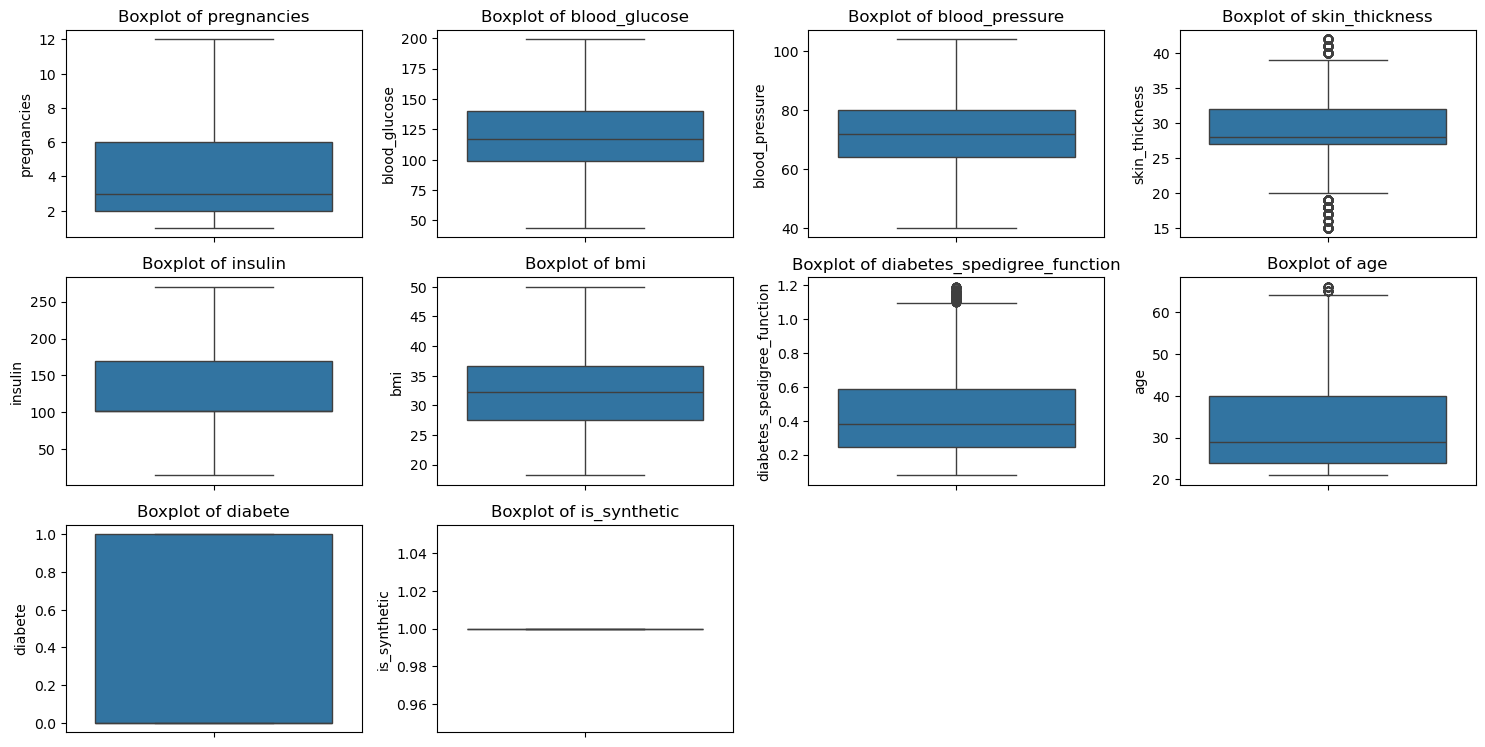

In [224]:
# Plot boxplots for all features to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(imputed_diabetes_df.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=imputed_diabetes_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### Combining Datasets

Below run only one or the other. Don't run both

##### 1. Merge by Concat Method

In [172]:
# Apply source to keep track where it from
stroke_df['source'] = 'stroke'
heart_disease_df['source'] = 'heart_disease'
diabete_df['source'] = 'diabete'

# Merge through concat
combined_df_concat = pd.concat([stroke_df, heart_disease_df], ignore_index=True)

##### 2. Merge by Pandas Merge Method

In [183]:
# Merge stroke and heart disease datasets
shared_columns = list(set(stroke_df.columns).intersection(heart_disease_df.columns))
print(f"Shared Columns: {shared_columns}")

# Merge through the pandas merge function
combined_df = pd.merge(stroke_df, heart_disease_df, on=shared_columns, how='inner')

print("Combined Dataset Shape: ", combined_df.shape)
combined_df.head()

Shared Columns: ['heart_disease', 'sex', 'age']
Combined Dataset Shape:  (37223, 19)


,age,hypertension,heart_disease,bmi,blood_glucose,sex,smoking_status,stroke,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67,0,1,36.6,228.69,0.0,formerly smoked,1,2,152,277,0,1,172,0,0.0,2,1,2
1,67,0,1,36.6,228.69,0.0,formerly smoked,1,2,152,277,0,1,172,0,0.0,2,1,2
2,67,0,1,36.6,228.69,0.0,formerly smoked,1,2,152,277,0,1,172,0,0.0,2,1,2
3,67,0,1,36.6,228.69,0.0,formerly smoked,1,0,106,223,0,1,142,0,0.3,2,2,2
4,67,0,1,36.6,228.69,0.0,formerly smoked,1,2,152,277,0,1,172,0,0.0,2,1,2


In [186]:
# Merge (Stroke and Heart Disease) with diabete datasets
shared_columns_2 = list(set(combined_df.columns).intersection(diabete_df.columns))
print(f"Shared Columns: {shared_columns_2}")

# Merge through the pandas merge function
combined_df_2 = pd.merge(combined_df, diabete_df, on=shared_columns_2, how='outer')

print("Combined Dataset Shape: ", combined_df_2.shape)
combined_df_2.head()

Shared Columns: ['blood_glucose', 'bmi', 'age']
Combined Dataset Shape:  (37983, 24)


,age,hypertension,heart_disease,bmi,blood_glucose,sex,smoking_status,stroke,cp,trestbps,...,exang,oldpeak,slope,ca,thal,pregnancies,blood_pressure,skin_thickness,insulin,diabetes_spedigree_function
0,36,NaN,NaN,25.0,44.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,62.0,27.0,102.5,0.587
1,61,0.0,0.0,33.2,55.26,0.0,Unknown,0.0,0.0,130.0,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
2,61,0.0,0.0,33.2,55.26,0.0,Unknown,0.0,0.0,145.0,...,1.0,1.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
3,61,0.0,0.0,33.2,55.26,0.0,Unknown,0.0,0.0,145.0,...,1.0,1.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
4,61,0.0,0.0,33.2,55.26,0.0,Unknown,0.0,0.0,130.0,...,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN


### Data Exploratory After Merging

In [143]:
# Check for missing values
print("Missing Values:\n", combined_df.isnull().sum())
print("\nDuplicated Values:\n", combined_df.duplicated())

Missing Values:
 age                  0
hypertension       283
heart_disease        0
bmi                283
blood_glucose      283
sex                  0
smoking_status     283
stroke             283
source               0
cp                5109
trestbps          5109
chol              5109
fbs               5109
restecg           5109
thalach           5109
exang             5109
oldpeak           5109
slope             5109
ca                5109
thal              5109
dtype: int64

Duplicated Values:
 0       False
1       False
2       False
3       False
4       False
        ...  
6433    False
6478    False
6634    False
6776    False
6894    False
Length: 5392, dtype: bool


In [142]:
# Drop duplicated values
combined_df.drop_duplicates(inplace=True)
combined_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6433    False
6478    False
6634    False
6776    False
6894    False
Length: 5392, dtype: bool

In [144]:
# Verify combined dataset
print("Combined Dataset Shape: ", combined_df.shape)
print("Combined Dataset Columns: ", combined_df.columns)

combined_df.describe().T

Combined Dataset Shape:  (5392, 20)
Combined Dataset Columns:  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'blood_glucose', 'sex',
       'smoking_status', 'stroke', 'source', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
age,5392.0,43.797849,22.242169,0.00,26.00,46.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5392.0,0.080490,0.272075,0.00,0.00,0.00,0.00,1.00
bmi,5109.0,28.894508,7.698235,10.30,23.80,28.40,32.80,97.60
blood_glucose,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
sex,5392.0,0.591988,0.491511,0.00,0.00,1.00,1.00,1.00
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00
cp,283.0,0.985866,1.031324,0.00,0.00,1.00,2.00,3.00
trestbps,283.0,129.883392,15.387795,94.00,120.00,130.00,140.00,170.00
chol,283.0,242.314488,44.654188,126.00,210.50,239.00,270.50,360.00


In [138]:
combined_df.head()

,age,hypertension,heart_disease,bmi,blood_glucose,sex,smoking_status,stroke,source,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67,0.0,1,36.600000,228.69,0.0,formerly smoked,1.0,stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,0.0,0,28.893237,202.21,1.0,never smoked,1.0,stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80,0.0,1,32.500000,105.92,0.0,never smoked,1.0,stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49,0.0,0,34.400000,171.23,1.0,smokes,1.0,stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79,1.0,0,24.000000,174.12,1.0,never smoked,1.0,stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
